# Графическая оценка генераторов псевдослучайных чисел

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

import crandom

In [2]:
plt.style.use('../../iPyNotebook/default_colors.mplstyle')

Выберем генератор для тестов и инициализируем его

In [3]:
N = 1000
NN = 100000
gen = crandom.Random(name='xorshift*')
gen.set_seed()

Используем генератор xorshift*,
Используем `randomint` для инициализации `seed`


# Графические тесты

Графические тесты позволяют оценить насколько полученная последовательность псевдослучайных чисел является независимо распределенной

- График последовательности (sequence plot).
- Диаграмма рассеяния (scatter plot) или график лага (lag-plot).
- Шестиугольная сетка (hexagonal binning) для большого объема данных.
- График корреляции в зависимости от лага (auto-correlation function plot, ACF-plot) или автокорелляции.
- Гистограмма и ядерная оценка плотности

## График последовательности
Для построения графика откладываем по оси $Ox$ номер числа от $1$ до $N$, а по оси $Oy$ значение этого числа. Для «хорошей» последовательности точки должны расположится хаотично и равномерно.

In [4]:
rnd = gen.generate(N)
# Нормуруем полученную последовательность.
# Для uint оператор /= не определен,
# поэтому делаем неэффективным способом
rnd = rnd / np.max(rnd)

Text(0,0.5,'Случайное число $x \\in [0, 1)$')

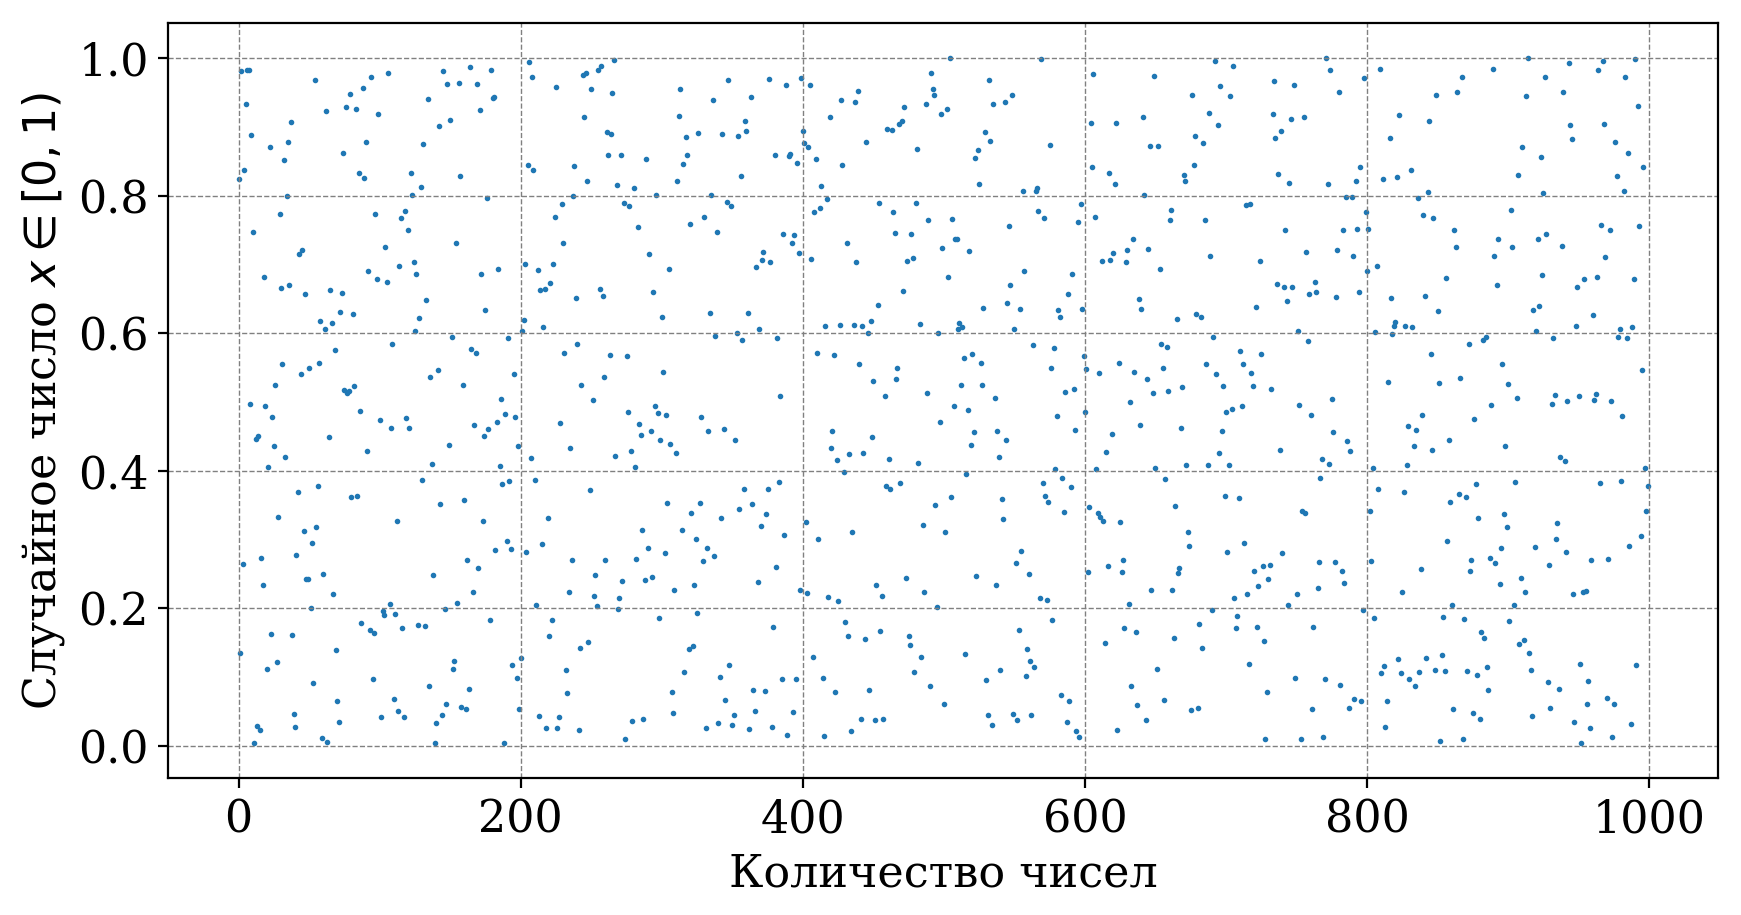

In [5]:
fig01 = plt.figure(1, figsize=(10, 5))
ax01 = fig01.add_subplot(1, 1, 1)

Ns = np.arange(0, N)
ax01.scatter(Ns, rnd, s=1)

ax01.set_xlabel('Количество чисел')
ax01.set_ylabel('Случайное число $x \in [0, 1)$')

## Диаграмма рассеяния или график лага

- **Диаграмма рассеяния** строится для двух сгенерированных последовательностей. Одна последовательность дает значения абсциссы $x_n$, а другая ординаты $y_n$. Если последовательности независимые случайно распределенные числа, то точки будут распалагаться симметрично относительно биссектриссы первой четверти. Иначе они будут формировать плотные группы.
- Если у нас нет возможности сгенерировать еще одну последовательность, то мы можем нарисовать **график лага**. Для этого в качестве одной последовательности возьмем ту же последовательность, но отбросив первые $l$ элементов, где $l$ задает смещение (лаг).

In [6]:
rnd_1 = gen.generate(N)
rnd_2 = gen.generate(N)

rnd_1 = rnd_1 / np.max(rnd_1)
rnd_2 = rnd_2 / np.max(rnd_2)

Text(0,0.5,'$y_{n}$')

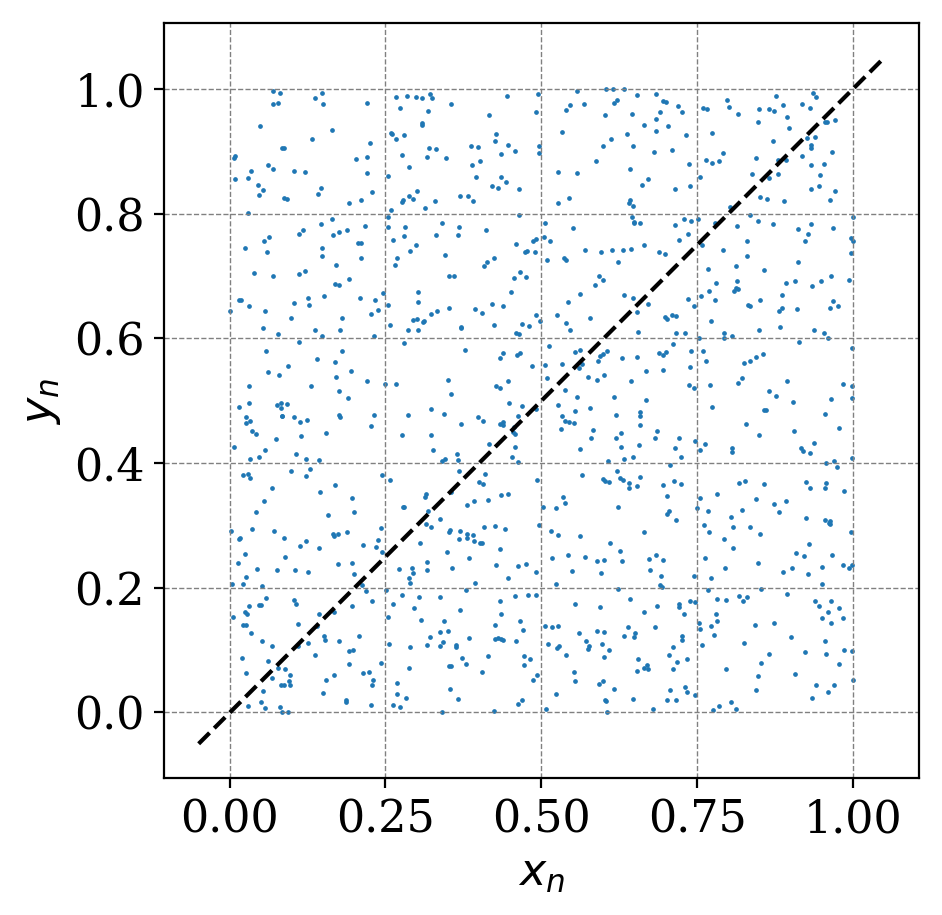

In [7]:
fig02 = plt.figure(2, figsize=(5, 5))
ax02 = fig02.add_subplot(1, 1, 1)

ax02.set_aspect('equal')

ax02.scatter(rnd_1, rnd_2, s=0.5)
# Биссектриса
ax02.plot(ax02.get_xlim(), ax02.get_ylim(), color='black', ls='--')

ax02.set_xlabel('$x_{n}$')
ax02.set_ylabel('$y_{n}$')

## Шестиугольная сетка (hexagonal binning)

Для большого объема данных использование диаграммы рассеяния затруднительно, так как все точки сливаются в однородный фон. В этом случвае поможет дургой тип графика. Все точки выборок группируются в шестиугольные области (гексы), которые раскрашиваются в зависимости от количества точек, попавших в гекс. Рядом с графиком приводится цветовая карта.

In [8]:
rnd_1 = gen.generate(NN)
rnd_2 = gen.generate(NN)

rnd_1 = rnd_1 / np.max(rnd_1)
rnd_2 = rnd_2 / np.max(rnd_2)

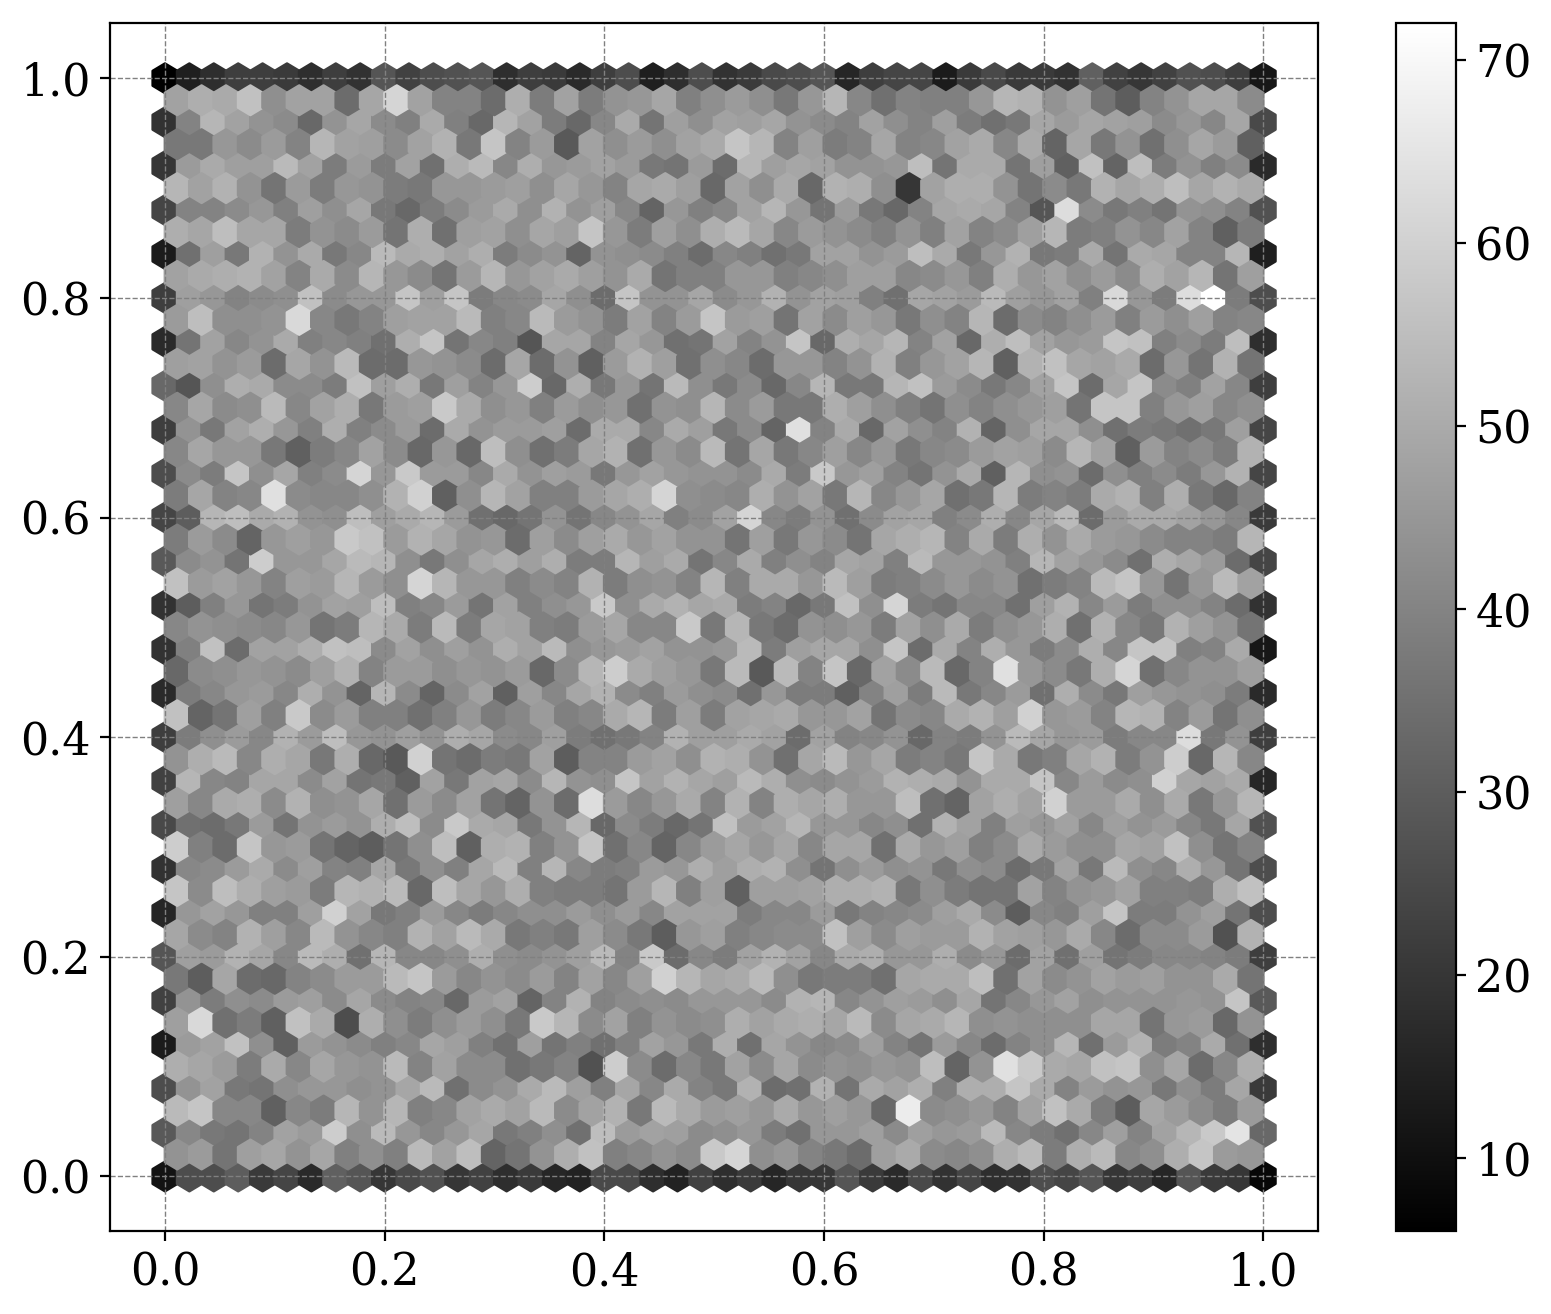

In [9]:
fig03 = plt.figure(3, figsize=(10, 8))
ax03 = fig03.add_subplot(1, 1, 1)
ax03.set_aspect('equal')
hb = ax03.hexbin(rnd_1, rnd_2, gridsize=45, cmap='gray') # cmap='inferno'
fig03.colorbar(hb, ax=ax03)

## График корреляции и матрица корреляции

Изымаем два ряда выборок из генератора и находим их коэффициенты корреляции

Если нет возможности изъять $2R$ выборки, то находим [автокорреляцию](https://ru.wikipedia.org/wiki/Автокорреляция) или автоковариацию и откладываем ее значения в зависимости от лага. Чем меньше — тем лучше. Если больше 1, то очень плохо.

In [10]:
rnd_1 = (gen.generate(N) for _ in range(50))
rnd_2 = (gen.generate(N) for _ in range(50))

rnd_1 = [r / np.max(r) for r in rnd_1]
rnd_2 = [r / np.max(r) for r in rnd_2]

In [11]:
num = np.arange(len(rnd_1))

# Зададим итератор
def it(): return (scipy.stats.pearsonr(r1, r2) for r1, r2 in zip(rnd_1, rnd_2))

# Вычисляем корреляцию Пирсона для нашей последовательности
cor = [c for c, *_ in it()]
# Вычисляем коэффициент ранговой корреляции Спирмена (ρ)
cor_rho = [c for c, *_ in it()]

Text(0,0.5,'Коэффициент \nкорреляции Пирсона')

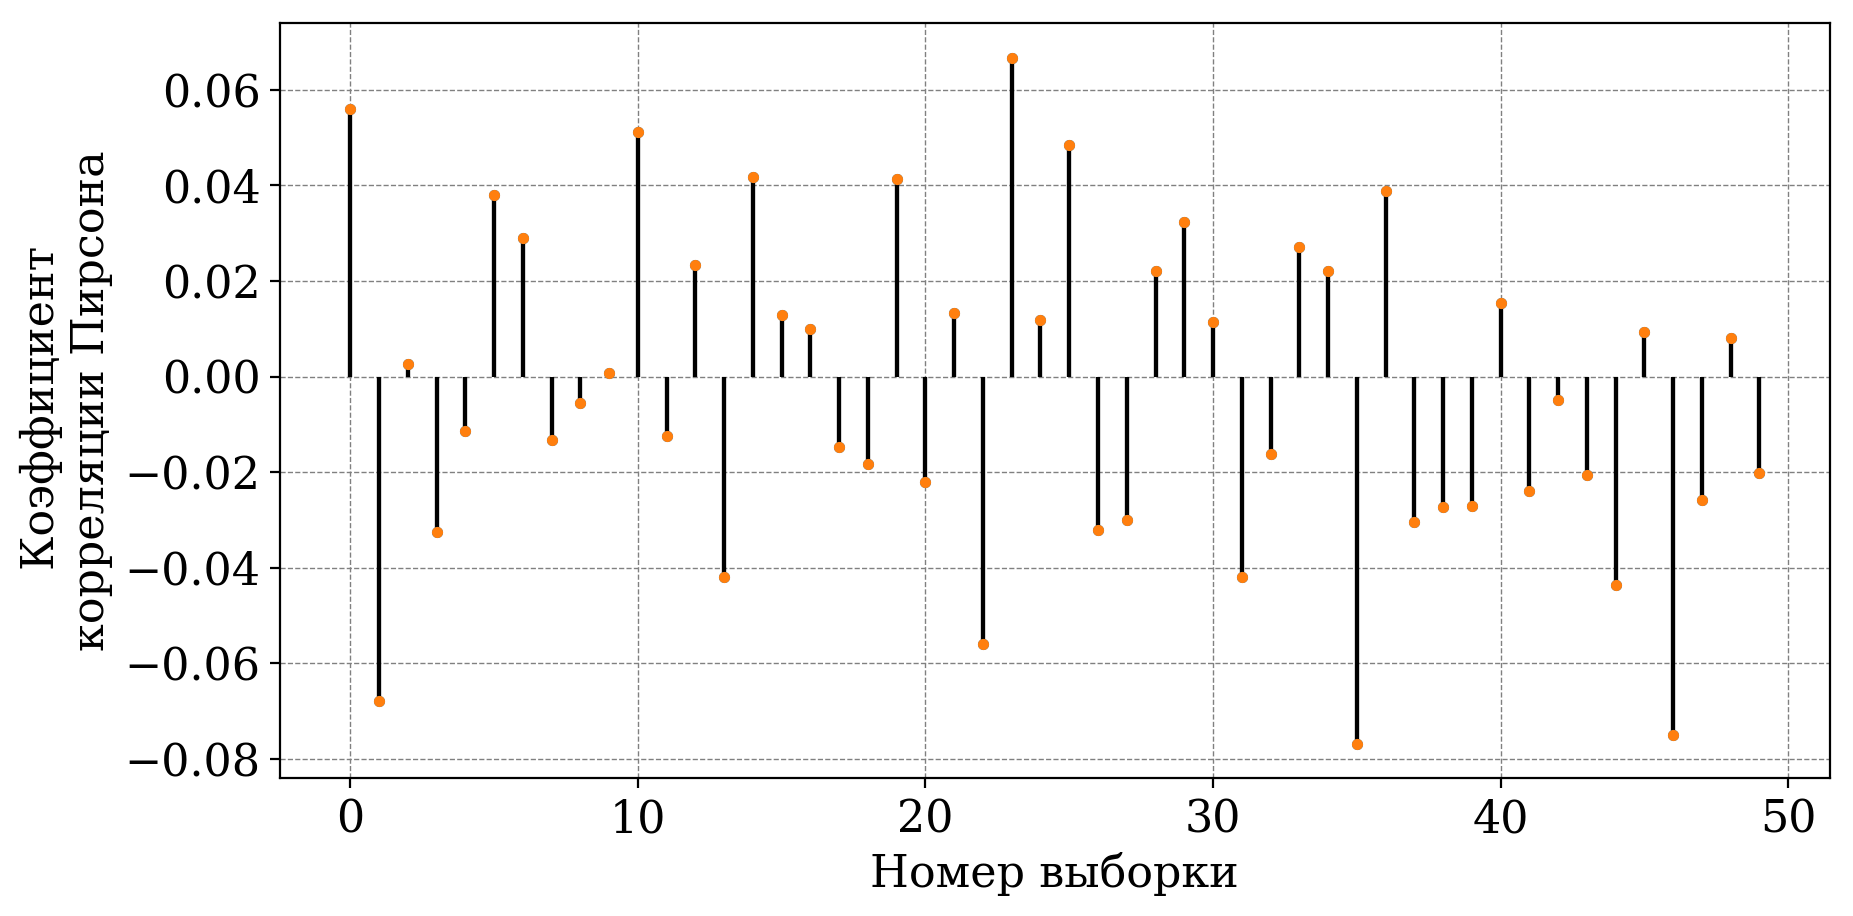

In [12]:
fig04 = plt.figure(4, figsize=(10, 5))
ax04 = fig04.add_subplot(1, 1, 1)

# Точки и вертикальные линии
ax04.plot(num, cor_rho, marker='o', ls='None')
ax04.vlines(num, 0, cor_rho)

ax04.plot(num, cor, marker='o', ls='None')
ax04.vlines(num, 0, cor)


# ax04.axhline(y=0.05)
# ax04.axhline(y=-0.05)

ax04.set_xlabel('Номер выборки')
ax04.set_ylabel('Коэффициент \nкорреляции Пирсона')

## Гистограмма и оценка плотности

In [13]:
rnd = gen.generate(10**5)
rnd = rnd / np.max(rnd)

In [14]:
# Для сглаживания гистограммы используем ядерную оценку плотности (KDE)
# Сглаживание происходит с помощью с нормальной ядерной функции
approx_dist = scipy.stats.gaussian_kde(rnd)

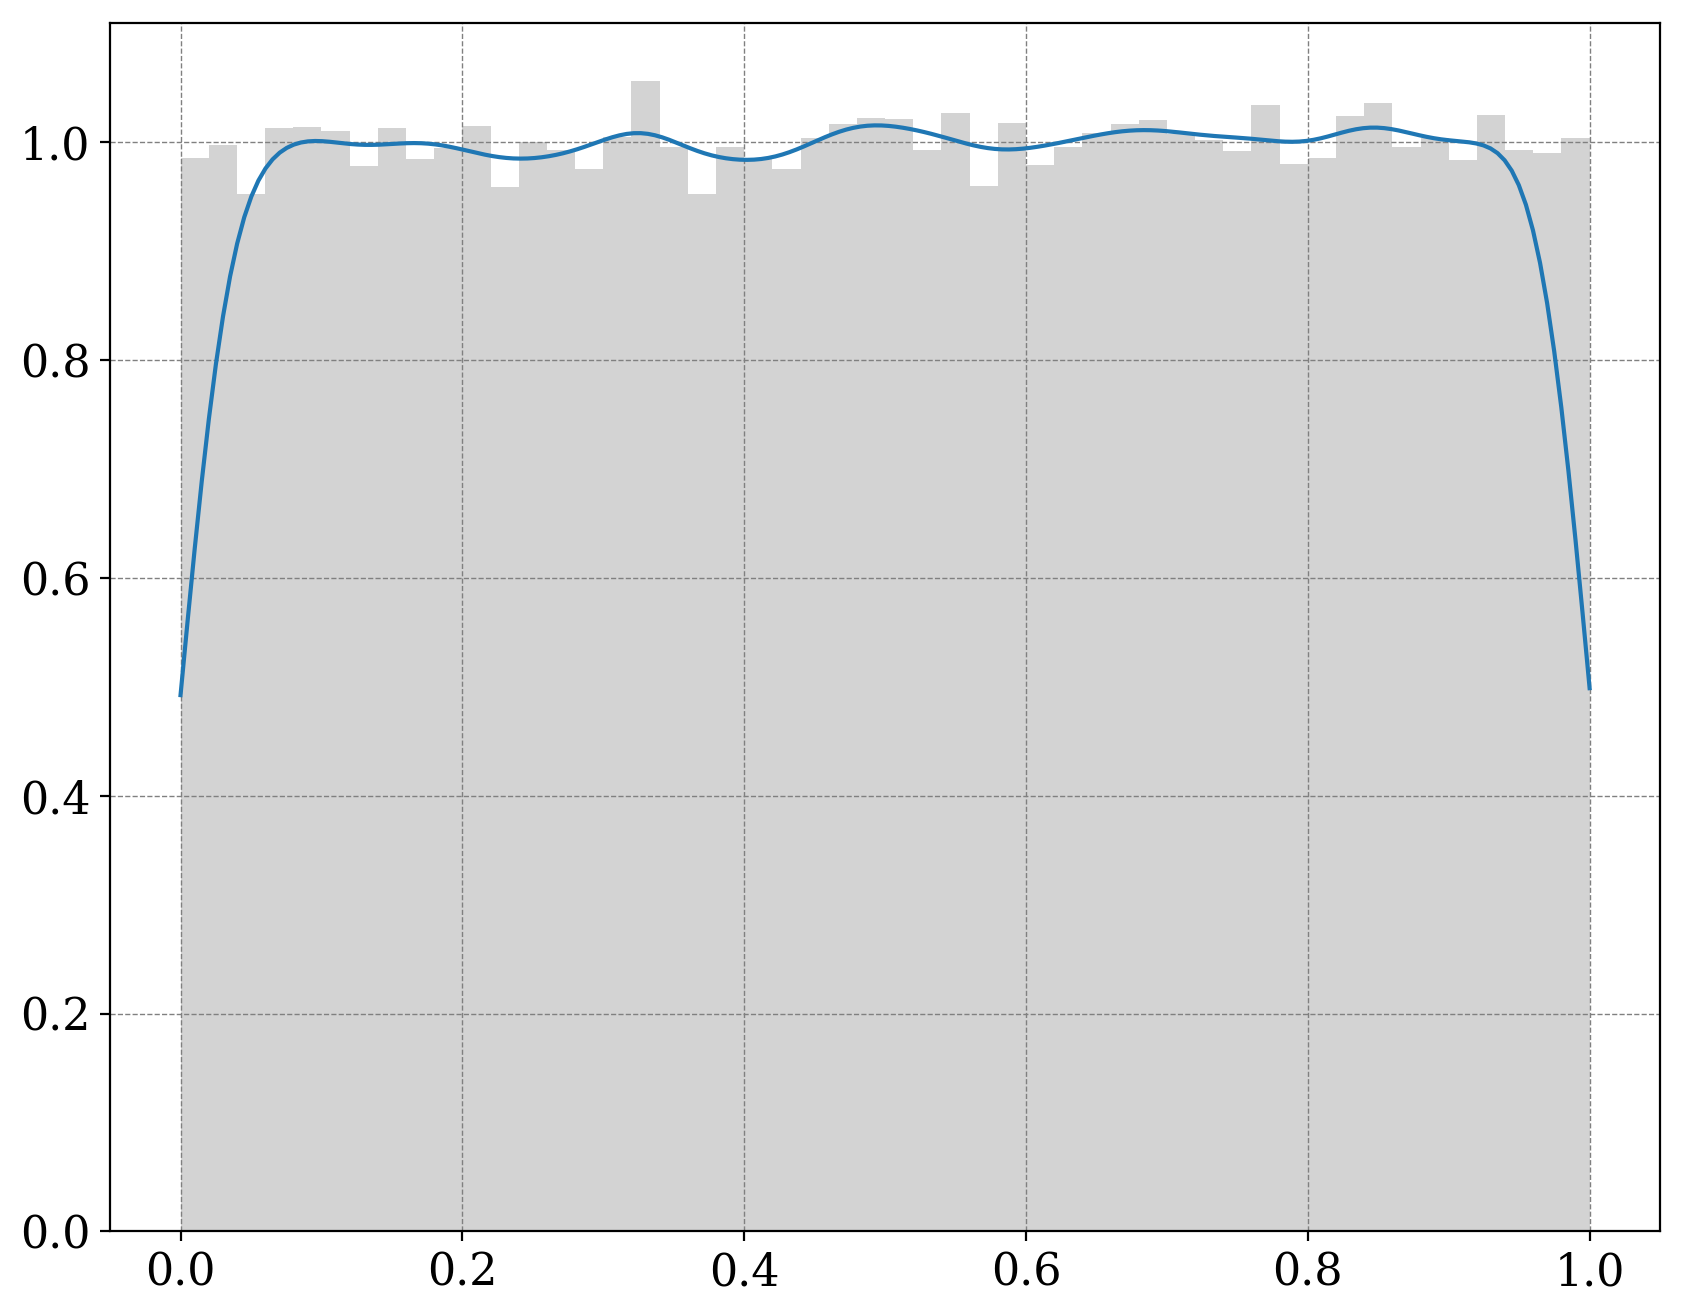

In [15]:
fig05 = plt.figure(5, figsize=(10, 8))

ax05 = fig05.add_subplot(1, 1, 1)

ax05.hist(rnd, bins=50, density=True, histtype='barstacked', color='lightgray');

xs = np.linspace(start=0, stop=1, num=200)
# Рисуем оценку плотности
ax05.plot(xs, approx_dist.pdf(xs))

## Распределение выборочных статистик

In [16]:
means = []
medians = []
vars_ = []

for _ in range(10**5):
    rnd = gen.generate(N)
    rnd = rnd / np.max(rnd)
    m = np.mean(rnd)
    means.append(m)
    m = np.median(rnd)
    medians.append(m)
    m =  np.var(rnd)
    vars_.append(m)
    
means = np.array(means, copy=False)
medians = np.array(medians, copy=False)
vars_ = np.array(vars_, copy=False)


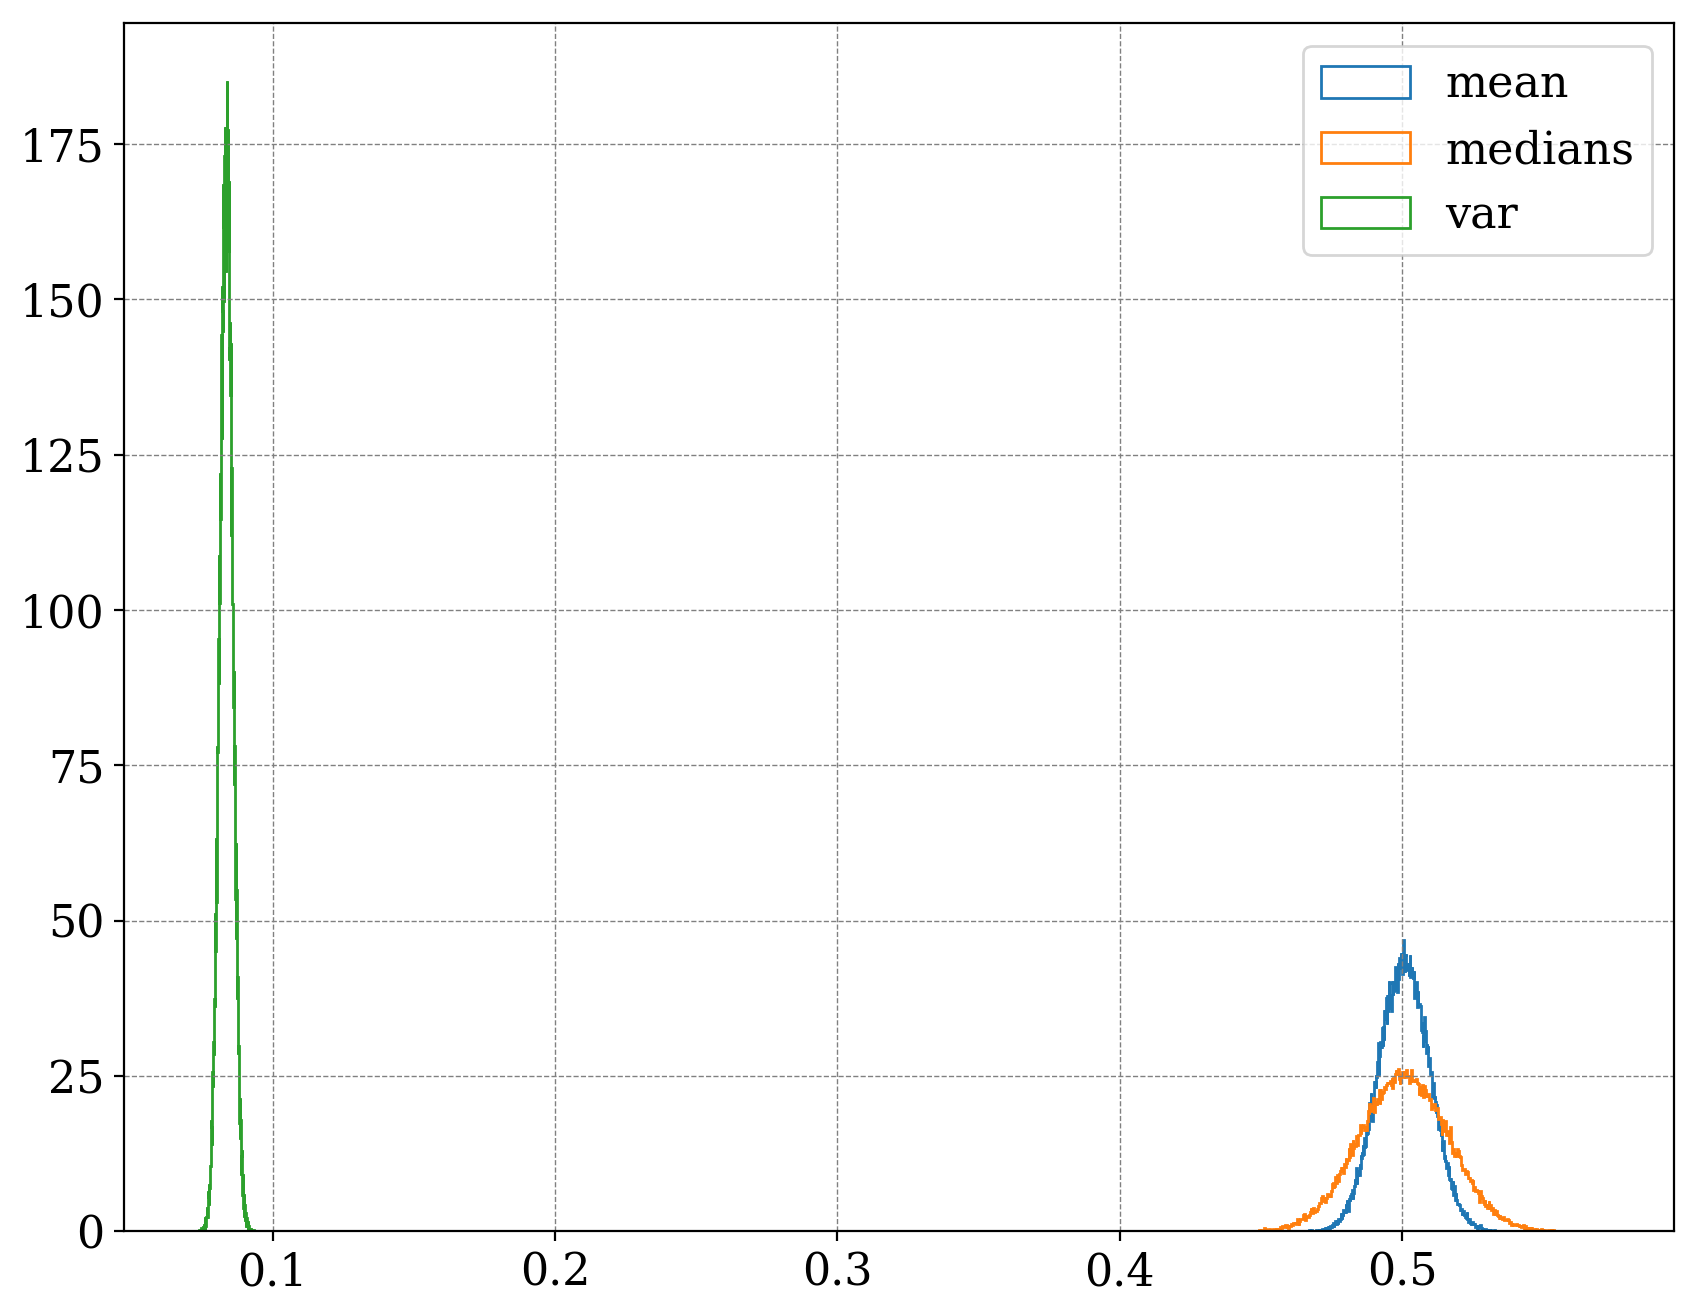

In [17]:
fig06 = plt.figure(6, figsize=(10, 8))

ax06 = fig06.add_subplot(1, 1, 1)

ax06.hist(means, bins=500, density=True, histtype='step', label='mean');
ax06.hist(medians, bins=500, density=True, histtype='step', label='medians');
ax06.hist(vars_, bins=500, density=True, histtype='step', label='var');

# Оценка плотности тут почему-то не работает нормально
# xs = np.linspace(start=ms.min(), stop=ms.max(), num=200)
# Рисуем оценку плотности
# ax06.plot(xs, approx_dist.pdf(xs))
ax06.legend()